Customer Segmentation System

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
import plotly.express as px

In [3]:
cust_data = pd.read_csv(r"C:\Users\NEW\OneDrive\Desktop\Customer Segmentation System\Mall_Customers.csv")

In [4]:
cust_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
cust_data.shape

(200, 5)

In [7]:
cust_data.info()

<class 'pandas.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Gender                  200 non-null    str  
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
dtypes: int64(4), str(1)
memory usage: 7.9 KB


In [38]:
cust_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Only annual income and spending score feature included in X

In [ ]:
X = cust_data.iloc[:, [3,4]].values

Adding age feature with X1

In [ ]:
X1 = cust_data.iloc[:, [2,3,4]].values   

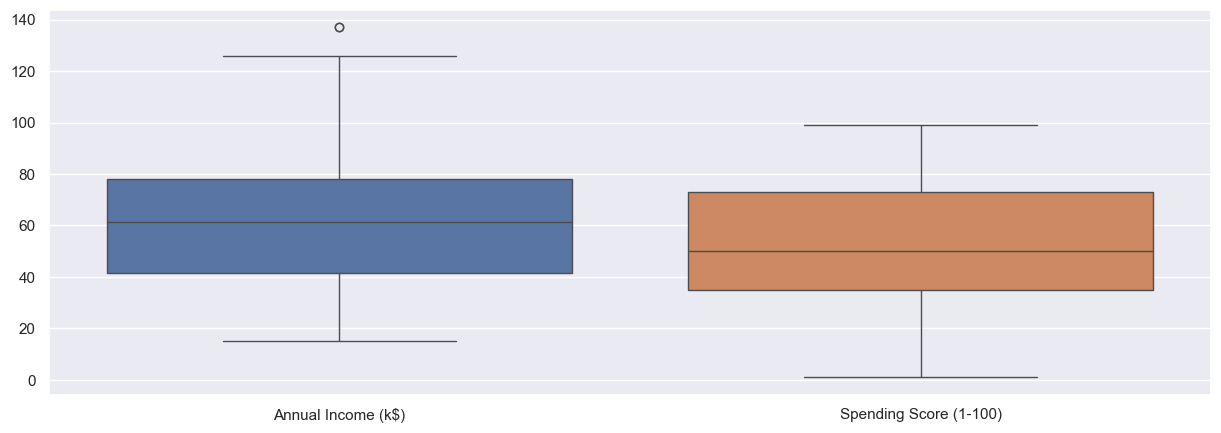

In [19]:
plt.figure(figsize=(15,5))
sns.boxplot(data=cust_data.iloc[:, [3,4]])  # iloc stands for integer-location based indexing.It lets you select rows and columns by their index numbers, not by names.
plt.show()

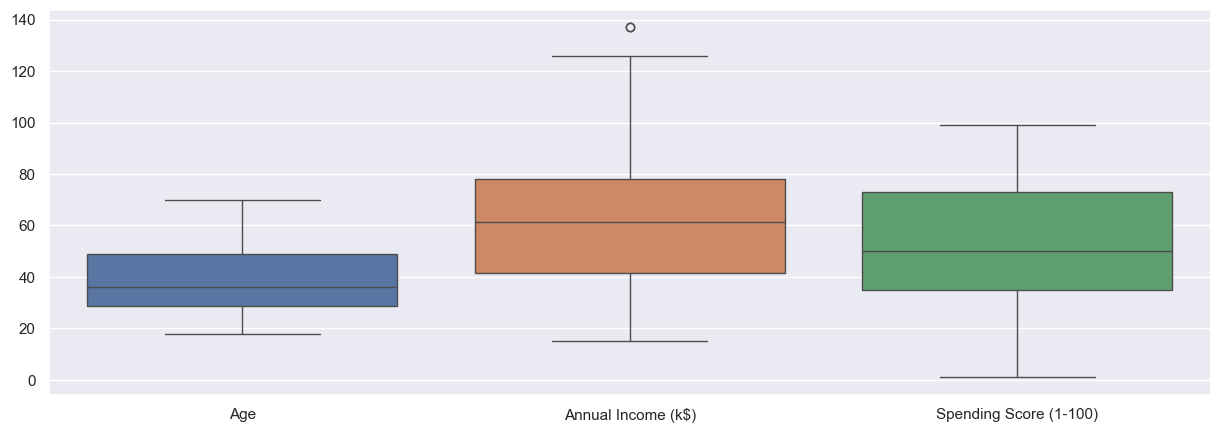

In [36]:
plt.figure(figsize=(15,5))
sns.boxplot(data=cust_data.iloc[:, [2,3,4]])  # iloc stands for integer-location based indexing.It lets you select rows and columns by their index numbers, not by names.
plt.show()

In [9]:
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

In [39]:
print(X1)

[[ 19  15  39]
 [ 21  15  81]
 [ 20  16   6]
 [ 23  16  77]
 [ 31  17  40]
 [ 22  17  76]
 [ 35  18   6]
 [ 23  18  94]
 [ 64  19   3]
 [ 30  19  72]
 [ 67  19  14]
 [ 35  19  99]
 [ 58  20  15]
 [ 24  20  77]
 [ 37  20  13]
 [ 22  20  79]
 [ 35  21  35]
 [ 20  21  66]
 [ 52  23  29]
 [ 35  23  98]
 [ 35  24  35]
 [ 25  24  73]
 [ 46  25   5]
 [ 31  25  73]
 [ 54  28  14]
 [ 29  28  82]
 [ 45  28  32]
 [ 35  28  61]
 [ 40  29  31]
 [ 23  29  87]
 [ 60  30   4]
 [ 21  30  73]
 [ 53  33   4]
 [ 18  33  92]
 [ 49  33  14]
 [ 21  33  81]
 [ 42  34  17]
 [ 30  34  73]
 [ 36  37  26]
 [ 20  37  75]
 [ 65  38  35]
 [ 24  38  92]
 [ 48  39  36]
 [ 31  39  61]
 [ 49  39  28]
 [ 24  39  65]
 [ 50  40  55]
 [ 27  40  47]
 [ 29  40  42]
 [ 31  40  42]
 [ 49  42  52]
 [ 33  42  60]
 [ 31  43  54]
 [ 59  43  60]
 [ 50  43  45]
 [ 47  43  41]
 [ 51  44  50]
 [ 69  44  46]
 [ 27  46  51]
 [ 53  46  46]
 [ 70  46  56]
 [ 19  46  55]
 [ 67  47  52]
 [ 54  47  59]
 [ 63  48  51]
 [ 18  48  59]
 [ 43  48 

Choosing the best number of clusters

WCSS - Within Clusters Sum of Squares

In [10]:
# Finding the wcss value for 1-10 clusters and choosing the most optimal later
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)

    wcss.append(kmeans.inertia_)

In [42]:
# Finding the wcss value for 1-10 clusters and choosing the most optimal later
wcss1 = []

for i in range(1, 11):
    kmeans1 = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans1.fit(X1)

    wcss1.append(kmeans1.inertia_)

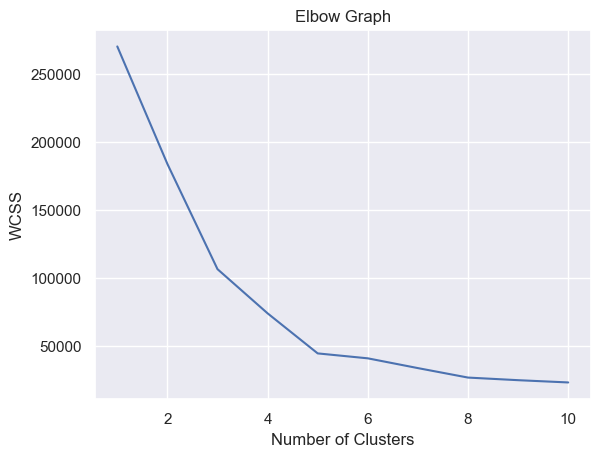

In [11]:
# plotting an elbow graph to get the optimal number

sns.set_theme()
plt.plot(range(1,11), wcss)
plt.title("Elbow Graph")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

So, number of clusters = 5

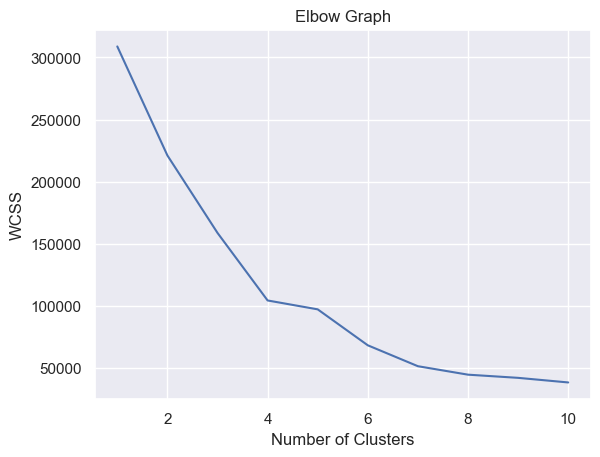

In [43]:
# plotting an elbow graph to get the optimal number

sns.set_theme()
plt.plot(range(1,11), wcss1)
plt.title("Elbow Graph")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

Optimal Number of Clusters with age feature addes: 4

Training model now

In [13]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

# Now, I need to return a label for every cluster like:
Y = kmeans.fit_predict(X)

In [14]:
print(Y)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


In [44]:
# kmeans with age
kmeans1 = KMeans(n_clusters=4, init='k-means++', random_state=42) 

In [29]:
X_std = StandardScaler().fit_transform(X)
Y_std = kmeans.fit_predict(X_std)

In [ ]:
X_std1 = StandardScaler().fit_transform(X1)
Y_std1 = kmeans.fit_predict(X_std1)

In [58]:
cust_data1 = cust_data.copy()

cust_data1['Cluster_with_Age'] = Y_std1

In [30]:
sil_std = silhouette_score(X_std, Y_std)

In [46]:
sil_std1 = silhouette_score(X_std1, Y_std1)

In [31]:
print("StandardScaler Silhouette:", sil_std)

StandardScaler Silhouette: 0.5546571631111091


In [47]:
print("StandardScaler Silhouette with age feature:", sil_std1)

StandardScaler Silhouette with age feature: 0.41664341513732767


Got Silhouette score of 0.41 which shows that age is adding noise

In [52]:
X_rob = RobustScaler().fit_transform(X)
labels_rob = kmeans.fit_predict(X_rob)

In [53]:
sil_rob = silhouette_score(X_rob, labels_rob)

In [54]:
print("RobustScaler Silhouette:", sil_rob)

RobustScaler Silhouette: 0.5516518249155914


Got a very similar silhouette score for standard and robust scaling which means that outliers are not dominating my workflow and also chose standard scaling as it is a bit bigger

Visualization

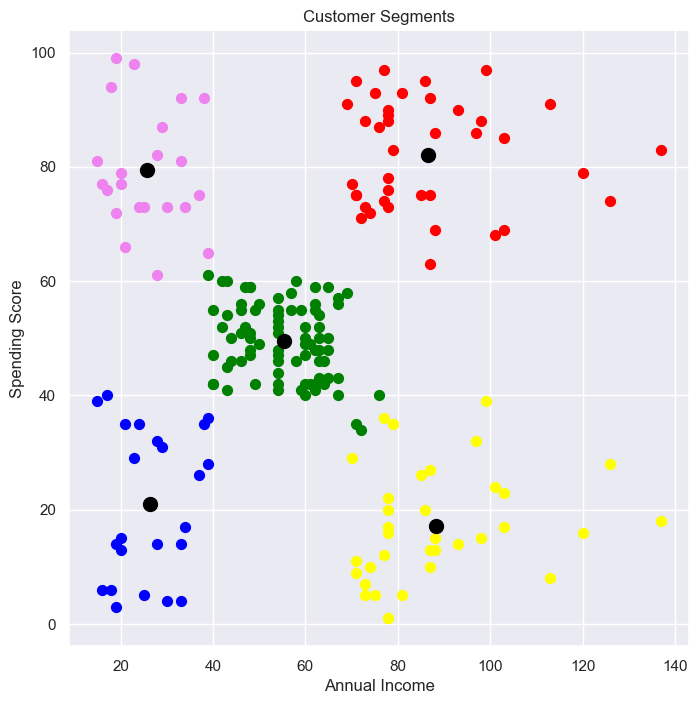

In [15]:
# Plotting clusters and their centroids
# X_axis: annual income Y_Axis: Spending Score represented by 0 and 1 below
plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='blue', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='violet', label='Cluster 5')

# Plotting the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='black', label='centroids')

plt.title('Customer Segments')
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()

In [18]:
score = silhouette_score(X, Y)
print("Silhouette Score:", score)

# Getting a Silhouette Score of 0.55 with 5 clusters and no scaling and no outlier detection

Silhouette Score: 0.553931997444648


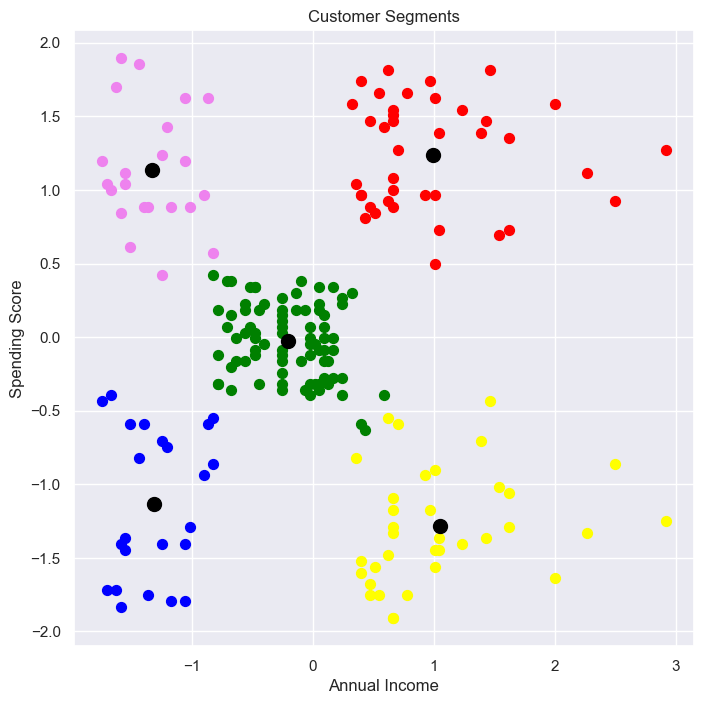

In [32]:
# Visualization now with scaled data (better)
# Plotting clusters and their centroids
# X_axis: annual income Y_Axis: Spending Score represented by 0 and 1 below
plt.figure(figsize=(8,8))
plt.scatter(X_std[Y_std==0,0], X_std[Y_std==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X_std[Y_std==1,0], X_std[Y_std==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X_std[Y_std==2,0], X_std[Y_std==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X_std[Y_std==3,0], X_std[Y_std==3,1], s=50, c='blue', label='Cluster 4')
plt.scatter(X_std[Y_std==4,0], X_std[Y_std==4,1], s=50, c='violet', label='Cluster 5')

# Plotting the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='black', label='centroids')

plt.title('Customer Segments')
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()

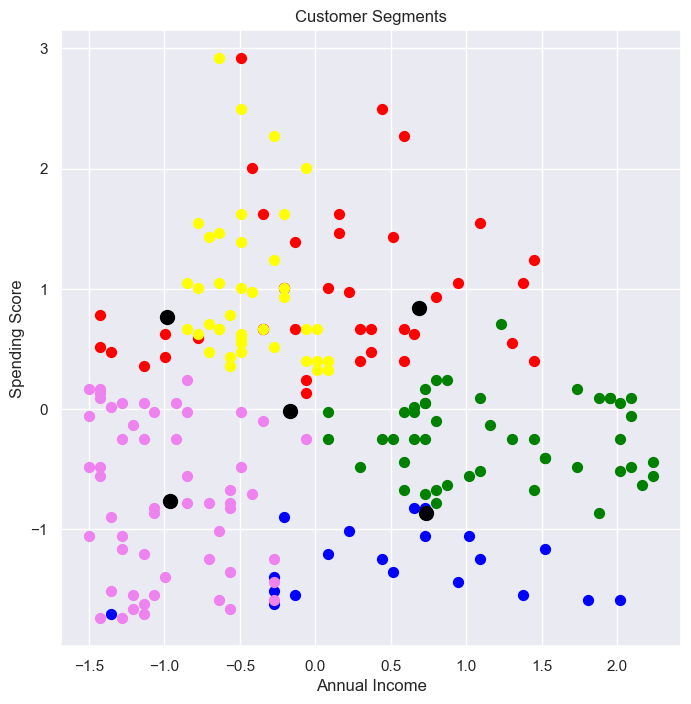

In [55]:
# With Age Feature
# Plotting clusters and their centroids
# X_axis: annual income Y_Axis: Spending Score represented by 0 and 1 below
plt.figure(figsize=(8,8))
plt.scatter(X_std1[Y_std1==0,0], X_std1[Y_std1==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X_std1[Y_std1==1,0], X_std1[Y_std1==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X_std1[Y_std1==2,0], X_std1[Y_std1==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X_std1[Y_std1==3,0], X_std1[Y_std1==3,1], s=50, c='blue', label='Cluster 4')
plt.scatter(X_std1[Y_std1==4,0], X_std1[Y_std1==4,1], s=50, c='violet', label='Cluster 5')

# Plotting the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='black', label='centroids')

plt.title('Customer Segments')
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()

In [60]:
# 3D scatter plot
fig = px.scatter_3d(
    cust_data1,
    x='Age',                    # X-axis
    y='Annual Income (k$)',     # Y-axis
    z='Spending Score (1-100)', # Z-axis
    color='Cluster_with_Age',   # Color by cluster
    symbol='Cluster_with_Age',  # Optional: different symbols
    size_max=10,
    hover_data=['Gender', 'CustomerID']  # extra info on hover
)

fig.update_layout(
    title='Customer Segmentation with Age (3D)',
    scene=dict(
        xaxis_title='Age',
        yaxis_title='Annual Income (k$)',
        zaxis_title='Spending Score'
    )
)

fig.show()

Adding names to clusters